In [ ]:
# pip install scikit-learn

In [5]:
import os

def load_imdb_data(data_dir):
    texts = []
    labels = []
    
    pos_dir = os.path.join(data_dir, "pos")
    for pos_name in os.listdir(pos_dir):
        # 读取 txt 文件的方式
        with open(os.path.join(pos_dir, pos_name), "r", encoding="utf-8") as f:
            texts.append(f.read())
            labels.append(1)
    
    neg_dir = os.path.join(data_dir, "neg")
    for filename in os.listdir(neg_dir):
        with open(os.path.join(neg_dir, filename), 'r', encoding='utf-8') as f:
            texts.append(f.read())
            labels.append(0)  # 负面评论标签为 0

    return texts, labels

# 加载训练集和测试集
train_texts, train_labels = load_imdb_data('aclImdb/train')
test_texts, test_labels = load_imdb_data('aclImdb/test')

# 打印样本
print(f"训练集大小: {len(train_texts)}")
print(f"测试集大小: {len(test_texts)}")
print(f"示例文本: {train_texts[0]}")
print(f"示例标签: {train_labels[0]}")

训练集大小: 25000
测试集大小: 25000
示例文本: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
示例标签: 1


训练集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None

测试集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None

训练集标签分布:
label
1    12500
0    12500
Name: count, dtype: int64

测试集标签分布:
label
1    12500
0    12500
Name: count, dtype: int64

训练集文本长度统计:
count    25000.00000
mean      1325.06964
std       1003.13367
min         52.00000
25%        702.00000
50%        979.00000
75%       1614.00000
max      13704.00000
Name: text_length, dtype: float64

测试集文本长度统计:
count    2500

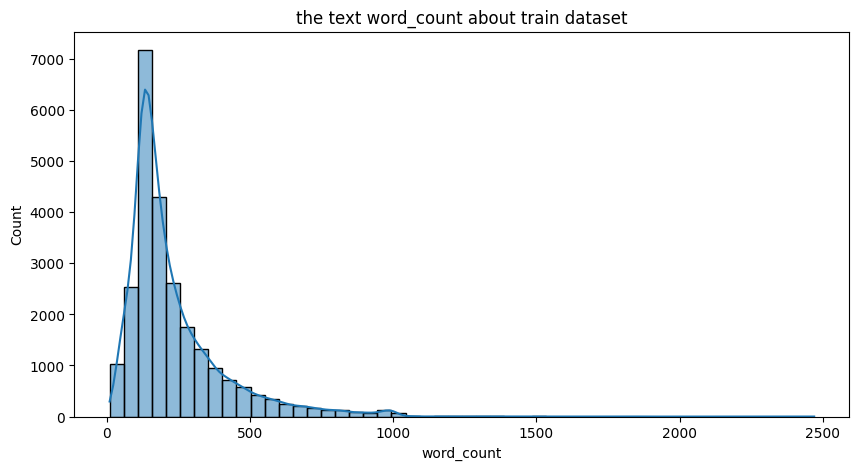

In [6]:
# 对数据进行探索性分析，了解数据的基本特征
import pandas as pd

# 将数据转换为 DataFrame
train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
test_df = pd.DataFrame({'text': test_texts, 'label': test_labels})

# 查看数据基本信息
print("训练集信息:")
print(train_df.info())
print("\n测试集信息:")
print(test_df.info())

# 查看标签分布
print("\n训练集标签分布:")
print(train_df['label'].value_counts())
print("\n测试集标签分布:")
print(test_df['label'].value_counts())

# 查看文本长度分布
train_df['text_length'] = train_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)

print("\n训练集文本长度统计:")
print(train_df['text_length'].describe())
print("\n测试集文本长度统计:")
print(test_df['text_length'].describe())

# 统计词数
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['word_count'] = test_df['text'].apply(lambda x: len(x.split()))

# 查看词数分布
print("训练集词数统计:")
print(train_df['word_count'].describe())
print("\n测试集词数统计:")
print(test_df['word_count'].describe())

# 可视化文本长度分布
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(train_df['word_count'], bins=50, kde=True)
plt.title("the text word_count about train dataset")
plt.show()

In [7]:
# 根据训练集文本构建词汇表，将文本转换为数值表示。
from collections import Counter

# 构建词汇表
def build_vocab(texts, vocab_size=10000):
    counter = Counter()
    for text in texts:
        counter.update(text.split())
    vocab = {word: idx + 2 for idx, (word, _) in enumerate(counter.most_common(vocab_size))}
    vocab['<PAD>'] = 0  # 填充符
    vocab['<UNK>'] = 1  # 未知词
    return vocab

# 只会编码出现次数最多的10000个词
vocab = build_vocab(train_texts, vocab_size=10000)
print(f"词汇表大小: {len(vocab)}")
print("示例词汇:", list(vocab.items())[:10])

词汇表大小: 10002
示例词汇: [('the', 2), ('a', 3), ('and', 4), ('of', 5), ('to', 6), ('is', 7), ('in', 8), ('I', 9), ('that', 10), ('this', 11)]


In [8]:
# 检查有多少词汇被映射为 <UNK>
def count_unk_words(texts, vocab):
    unk_count = 0
    total_count = 0
    for text in texts:
        for word in text.split():
            total_count += 1
            if word not in vocab:
                unk_count += 1
    return unk_count, total_count

unk_count, total_count = count_unk_words(train_texts, vocab)
print(f"未知词数量: {unk_count}")
print(f"总词数: {total_count}")
print(f"未知词比例: {unk_count / total_count:.2%}")

未知词数量: 802253
总词数: 5844680
未知词比例: 13.73%


In [9]:
# 使用词汇表将文本转换为数值序列
def text_to_sequence(text, vocab):
    return [vocab.get(word, vocab['<UNK>']) for word in text.split()]

# 转换训练集和测试集
train_sequences = [text_to_sequence(text, vocab) for text in train_texts]
test_sequences = [text_to_sequence(text, vocab) for text in test_texts]

print("示例文本:", train_texts[0])
print("转换后的序列:", train_sequences[0])

示例文本: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
转换后的序列: [1, 2717, 7, 3, 1398, 1350, 56, 2215, 31, 2, 169, 83, 15, 46, 80, 9006, 42, 518, 776, 138, 15, 1, 359, 7182, 190, 8, 2, 5768, 8850, 493, 84, 6, 263, 10, 1, 1, 2618, 7, 78, 2641, 6

In [13]:
import numpy as np

def pad_sequence(sequences, max_len, pad_value=0):
    padded = np.full((len(sequences), max_len), pad_value)
    for i, sequence in enumerate(sequences):
        if len(sequence) > max_len:
            padded[i] = sequence[:max_len]
        else:
            padded[i, :len(sequence)] = sequence
        
    return padded

# 根据前面的分布来看，300可以包含>75% 的数据
max_len = 300
train_padded = pad_sequence(train_sequences, max_len)
test_padded = pad_sequence(test_sequences, max_len)

print(f"裁剪后的序列维度：{train_padded.shape}")
print(f"序列示例：{train_padded[0]}")

裁剪后的序列维度：(25000, 300)
序列示例：[   1 2717    7    3 1398 1350   56 2215   31    2  169   83   15   46
   80 9006   42  518  776  138   15    1  359 7182  190    8    2 5768
 8850  493   84    6  263   10    1    1 2618    7   78 2641    6  897
   70    7    1   19    1    6 2701    1    2 7910 1890   35   64   67
  257  148   55 1703    1    1    2    1    5    2  213 5388   37 2973
   84    5    2 8534    9  635    4   55 9007  283    9  207    2  482
    8   61    3 1831 4548  762    6 4381  215    2 3138    9 1369    1
    1   31    1    1  133  441 7520    1  160  225    6    1   32    5
  117    1    1    1    6    1    1    9  543   10  102 2041    5   66
  877   98   10    1 2717    7  237    1  255    3 3139   10   12    1
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0

In [14]:
import pickle

# 词汇表, wb以二级制格式写入
with open("vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)
    
with open("train_padded.pkl", "wb") as f:
    pickle.dump((train_padded, train_labels), f)
    
with open("test_padded.pkl", "wb") as f:
    pickle.dump((test_padded, test_labels), f)

In [15]:
# rb以二级制格式读取
with open("vocab.pkl", "rb") as f:
    vocab = pickle.load(f)
    
with open("train_padded.pkl", "rb") as f:
    train_padded, train_labels = pickle.load(f)
    
with open("test_padded.pkl", "rb") as f:
    test_padded, test_labels = pickle.load(f)

### 再写数据读取器 dataloader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class IMDBDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels
        
    
        